In [3]:
from numpy import array
ket0 = array([1,0])
ket1 = array([0,1])

display(ket0 / 2 + ket1 / 2)
(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

array([0.5, 0.5])

In [4]:
m1 = array([[1,1], [0,0]])
m2 = array([[1,1], [1,0]])
(m1/2 + m2/2)

array([[1. , 1. ],
       [0.5, 0. ]])

In [6]:
from numpy import matmul
display(matmul(m1, ket1))
display(matmul(m1,m2))
matmul(m2,m1)

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

In [8]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
print(u)
v = Statevector([(1 + 2.0j) / 3, -2 /3])
print(v)
w = Statevector([1/3, 2/3])
print(w)

print("all state vectors have been defined")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,))
Statevector([0.33333333+0.j, 0.66666667+0.j],
            dims=(2,))
all state vectors have been defined


In [9]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [11]:
display(u.is_valid())
display(w.is_valid())

True

False

In [12]:
v = Statevector([(1 + 2.0j) / 3, -2/3])
v.draw("latex")

<IPython.core.display.Latex object>

In [13]:
v.is_valid()

True

In [19]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

In [20]:
#intentional testing of error
w.measure()

ValueError: probabilities do not sum to 1

{'0': 508, '1': 492}

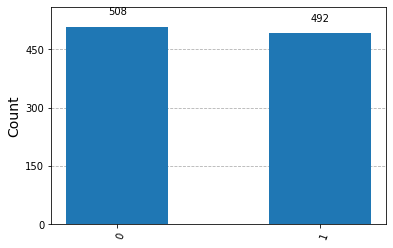

In [23]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [26]:
from qiskit.quantum_info import Operator

X = Operator([[0,1], [1,0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1,0])
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("latex")

<IPython.core.display.Latex object>

In [27]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [28]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw("latex")

<IPython.core.display.Latex object>

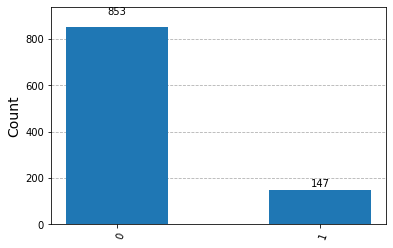

In [29]:
statistics = v.sample_counts(1000)
plot_histogram(statistics)